In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
gcredit = pd.read_csv("german_credit.csv")

In [3]:
gcredit.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = gcredit['default']
x = gcredit.drop(['default'], axis=1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [7]:
gcreditD = pd.get_dummies(data= gcredit, columns=['account_check_status', 'credit_history','purpose','savings','present_emp_since','personal_status_sex'
                                          ,'other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'])


In [8]:
gcredit1 = pd.concat([gcredit, gcreditD], axis=1)

### Check for highly correlated variables but don't required any treatment for this use case

In [9]:
g_corr =gcredit1.corr()
g_corr.T

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,default,duration_in_month,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000,0.214927,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927,1.000000,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739,0.624984,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404,0.074749,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967,0.034067,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127,-0.036136,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732,-0.011284,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015,-0.023834,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000,0.214927,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927,1.000000,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196


### Drop the original variables which are converted to dummy

In [10]:
gcredit_true = gcredit1.drop(['account_check_status', 'credit_history','purpose','savings','present_emp_since','personal_status_sex'
                                          ,'other_debtors','property','other_installment_plans','housing','job','telephone','foreign_worker'],axis=1)

In [11]:
gcredit_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
default                                                                       1000 non-null int64
duration_in_

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [12]:
y = gcredit_true['default']
x = gcredit_true.drop(['default'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [13]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
RFC

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [14]:
RFC.fit(x,y)
predicts = RFC.predict(x_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predicts))

Accuracy: 1.0


### Q6 Show the list of the features importance( 1 Marks)

In [15]:
RFC.feature_importances_

array([0.05070577, 0.072811  , 0.02116755, 0.02164749, 0.0551536 ,
       0.0115541 , 0.00702424, 0.05163883, 0.07136312, 0.02226128,
       0.0213445 , 0.05653077, 0.01116685, 0.00742485, 0.01393238,
       0.03060347, 0.00641396, 0.04887907, 0.00838465, 0.01708883,
       0.00708251, 0.01011169, 0.00758205, 0.00706345, 0.00667933,
       0.01388312, 0.00954941, 0.01172711, 0.00316036, 0.00115687,
       0.00997874, 0.00106938, 0.0005584 , 0.00482821, 0.01608282,
       0.00657781, 0.00467235, 0.01218151, 0.01072566, 0.0104226 ,
       0.01154177, 0.00977526, 0.00642919, 0.01171171, 0.00527048,
       0.00549363, 0.01153487, 0.00464169, 0.00645468, 0.0077002 ,
       0.01081519, 0.01126371, 0.01205057, 0.00889406, 0.01138834,
       0.01340518, 0.00504166, 0.00539008, 0.01128934, 0.00891846,
       0.00976219, 0.01181768, 0.0018324 , 0.00900612, 0.01089795,
       0.0105267 , 0.0023043 , 0.00265291])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
# Use below values
#num_folds = 10
#seed = 77

In [18]:
#Validate the Random Forest model build above using k fold

In [19]:
kfold = KFold(n_splits=10, shuffle=False,random_state=77)

In [20]:
RFC_cv_score = cross_val_score(RFC, x,y, cv=kfold, scoring='accuracy')

In [21]:
RFC_cv_score

array([0.86, 0.68, 0.74, 0.82, 0.77, 0.66, 0.76, 0.82, 0.76, 0.76])

In [22]:
#Calculate Mean score

In [23]:
RFC_cv_score.mean()

0.763

In [24]:
# Calculate score standard deviation using std()

In [25]:
RFC_cv_score.std()

0.05831809324729331

# Q8 Print the confusion matrix( 1 Marks)

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.values.argmax(axis=1),predicts.argmax(axis=1))

array([[300]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [27]:
from sklearn.metrics import classification_report
classification_report(y_test,predicts)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        89\n           1       1.00      1.00      1.00        89\n\n   micro avg       1.00      1.00      1.00       178\n   macro avg       1.00      1.00      1.00       178\nweighted avg       1.00      1.00      1.00       178\n samples avg       0.30      0.30      0.30       178\n'

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [28]:
#Hint: Use roc_curve

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
fpr, tpr, threshold = roc_curve(y_test.values.argmax(axis=1),predicts.argmax(axis=1))

(array([0., 1.]), array([nan, nan]), array([1, 0], dtype=int64))

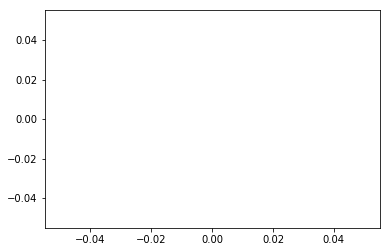

In [35]:
plt.plot(fpr, tpr, marker='.')

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [31]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [32]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

NameError: name 'X_train' is not defined

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())